# Lecture12 画像処理

matplotlibで指定可能な色

In [2]:
import matplotlib
matplotlib.colors.cnames

FLAG_fig=False

## 16 進数のカラーコードで指定
#ff0000 (赤), #000000 (黒) のような、HTML や CSS で用いられる 16 進数で指定することもできます

<BarContainer object of 8 artists>

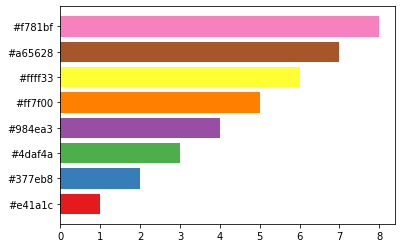

In [3]:
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure()
fig.patch.set_facecolor('white')
 
colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']
x = np.arange(1, 9)
height = np.arange(1, 9)
plt.barh(x, height, color=colorlist, tick_label=colorlist, align="center")



## RGB で指定
RGB それぞれのを色の要素を 0.0 ～ 1.0 のタプルで指定することも可能です。

<BarContainer object of 4 artists>

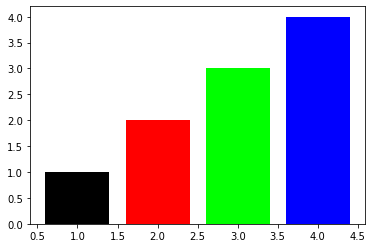

In [6]:
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure()
fig.patch.set_facecolor('white')
 
col1 = [0.0, 0.0, 0.0]
col2 = [1.0, 0.0, 0.0]
col3 = [0.0, 1.0, 0.0]
col4 = [0.0, 0.0, 1.0]
colorlist = [col1, col2, col3, col4]
 
x = np.arange(1, 5)
height = np.arange(1, 5)
#plt.bar(x, height, color=colorlist, tick_label=colorlist, align="center")
plt.bar(x, height, color=colorlist,  align="center")

### グレースケールで指定
‘0.0’ (黒) ～ ‘1.0’ (白) のグレースケールで指定することもできます。作成した資料を白黒印刷する場合に便利です

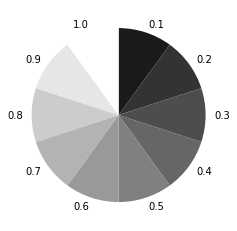

In [7]:
import matplotlib.pyplot as plt
 
x = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
colorlist = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
plt.pie(x, labels=colorlist, counterclock=False, startangle=90, colors=colorlist)
if FLAG_fig: plt.savefig('IMG_colorcodeGrayScale.png')

## OpenCV

https://tellusxdp.github.io/start-python-with-tellus/lesson8.html

とかみている

 pip install opencv-python

In [8]:
# -*- coding: utf-8 -*-
import cv2
import numpy as np

画像ファイルを読んで表示します。

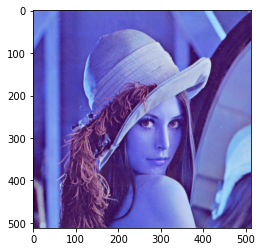

In [9]:
img_org = cv2.imread('data/lena_std.tif') # オリジナル画像の入力

plt.imshow(img_org)

OpenCVでimreadを使って読み込む場合、既定では、画像を「BGR」（青・緑・赤）の順の配列として読み込みます。対して、表示するためのmatplotlib.imshow()では、画像が「RGB」（赤・緑・青）の順の配列として構成されていることを前提としています。そのため、このまま表示すると、青と赤が入れ替わってしまうため、先に表示したように色がおかしくなってしまうのです。

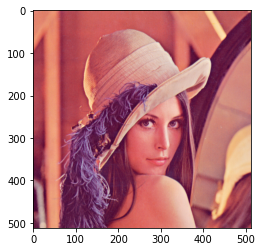

In [12]:
# BGRの画像をRGBに変換
rgb_img_org = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img_org)

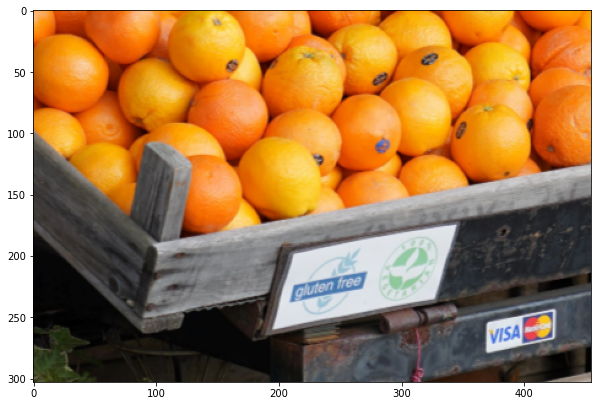

In [39]:
img_org = cv2.imread('data/lec12_sample.png') # オリジナル画像の入力
rgb_img_org = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,8))
plt.imshow(rgb_img_org)

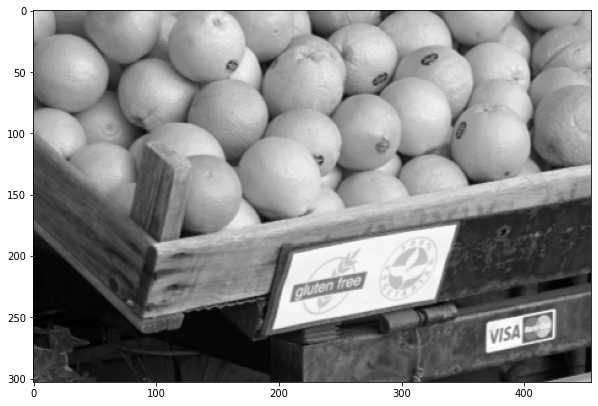

In [40]:
# グレースケール変換
img_gray = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (10,8))
plt.imshow( img_gray, cmap='gray')

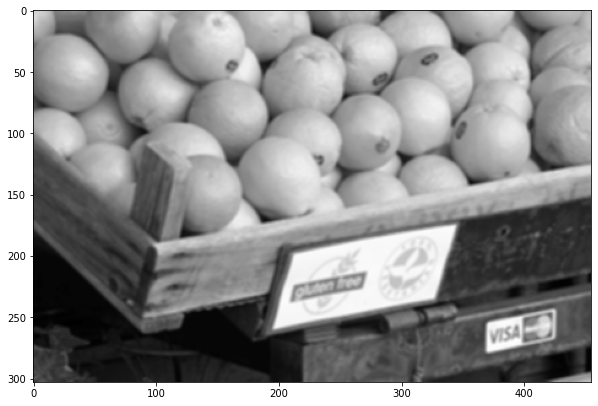

In [41]:
#平均値フィルタ

kernel_mean_3x3 = np.array([
                            [1/9,  1/9, 1/9],
                            [1/9,  1/9, 1/9],
                            [1/9,  1/9, 1/9]
                            ], np.float32)
img_mean_3x3 = cv2.filter2D(img_gray, -1, kernel_mean_3x3)
plt.figure(figsize = (10,8))
plt.imshow( img_mean_3x3, cmap='gray')

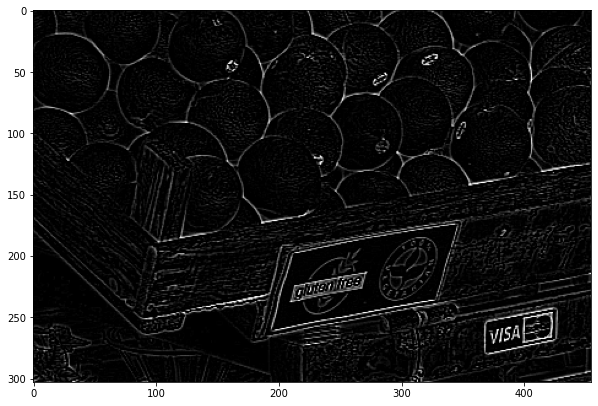

In [42]:
# ラプラシアン フィルタ（３×３）
kernel_laplacian_3x3 = np.array([
                            [1,  1, 1],
                            [1, -8, 1],
                            [1,  1, 1]
                            ], np.float32)
img_laplacian_3x3 = cv2.filter2D(img_gray, -1, kernel_laplacian_3x3)
plt.figure(figsize = (10,8))
plt.imshow( img_laplacian_3x3, cmap='gray')

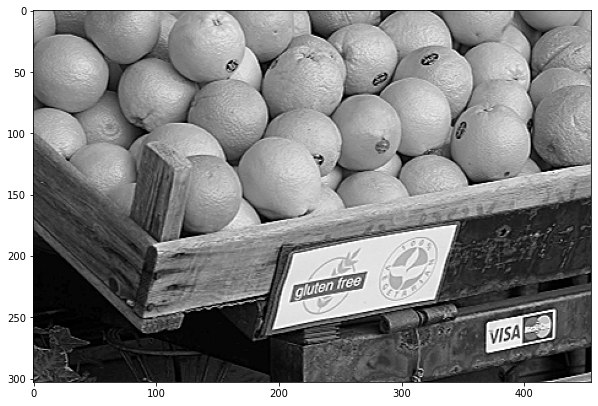

In [46]:
# 鮮鋭化 フィルタ（３×３）
kernel_sharp_3x3 = np.array([
                            [0,  -1, 0],
                            [-1, 5, -1],
                            [0,  -1, 0]
                            ], np.float32)
img_sharp_3x3 = cv2.filter2D(img_gray, -1, kernel_sharp_3x3)
plt.figure(figsize = (10,8))
plt.imshow( img_sharp_3x3, cmap='gray')

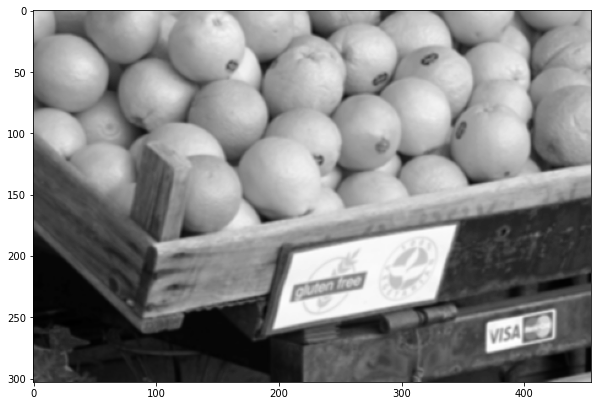

In [43]:
# ガウシアン フィルタ
kernel_gaussian = np.array([
                            [1,  2, 1],
                            [2,  4, 2],
                            [1,  2, 1]
                            ], np.float32) / 16
img_gaussian = cv2.filter2D(img_gray, -1, kernel_gaussian)
plt.figure(figsize = (10,8))
plt.imshow( img_gaussian, cmap='gray')

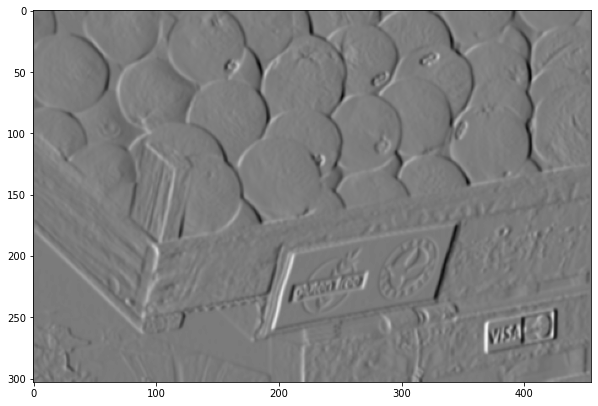

In [45]:
#エッジ抽出
edge_sob_x = cv2.Sobel(img_gray,cv2.CV_32F,1,0,ksize=5)
plt.figure(figsize = (10,8))
plt.imshow(edge_sob_x, cmap='gray')

## GrayScale
matplotlibの既定のカラーマップ設定によるものです。既定では、グレースケール画像の場合、色味が暗いほど青く、明るくなるにつれて 青 → 緑 → 黄色 の色味で表示されるという設定になっています。

そのため、JupyterLabで正しく 黒 → グレー → 白 の色味でモノクロ画像を表示するには、imshow() に、黒 → グレー → 白 の色味で表示できるよう、カラーマップの設定を追加する必要があります。具体的なコードの記述方法としては、 imshow() に cmap="gray" というキーワード引数を追記します。

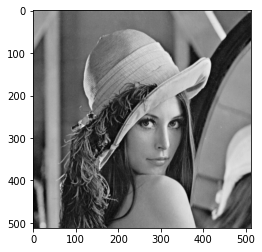

In [13]:
img_gry = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY) # グレイスケールに変換
plt.imshow(img_gry, cmap='gray')



スレッシュホールド値をへんかさせてみます。

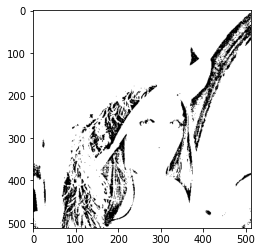

In [15]:
DEFAULT_THRESH_VAL = 128 # 閾値処理のデフォルト値
MAX_VAL = 255            # 8bit 階調を表す

threshVal = 50
retVal, img_bin = cv2.threshold(img_gry, threshVal, MAX_VAL, type=cv2.THRESH_BINARY)
plt.imshow(img_bin, cmap='gray')

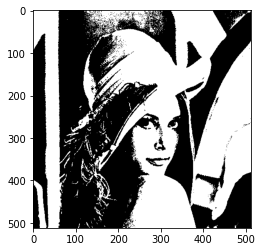

In [43]:
threshVal = 128
retVal, img_bin = cv2.threshold(img_gry, threshVal, MAX_VAL, type=cv2.THRESH_BINARY)
plt.imshow(img_bin, cmap='gray')
if FLAG_fig: plt.savefig('IMG_GrayTh_128.png')

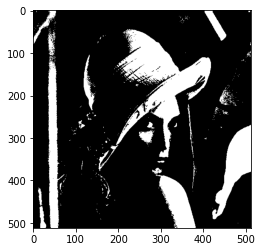

In [44]:
threshVal = 164
retVal, img_bin = cv2.threshold(img_gry, threshVal, MAX_VAL, type=cv2.THRESH_BINARY)
plt.imshow(img_bin, cmap='gray')
if FLAG_fig: plt.savefig('IMG_GrayTh_164.png')

## エッジ検出

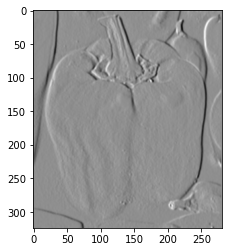

In [46]:
img_org = cv2.imread('data/test.jpg') # オリジナル画像の入力
img = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY) # グレイスケールに変換

edge_sob_x = cv2.Sobel(img,cv2.CV_32F,1,0,ksize=5)
plt.imshow(edge_sob_x, cmap='gray')
if FLAG_fig: plt.savefig('IMG_edge_sob_x.png')

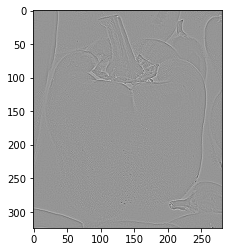

In [47]:
edge_lapl = cv2.Laplacian(img, cv2.CV_32F) 
plt.imshow(edge_lapl, cmap='gray')
if FLAG_fig: plt.savefig('IMG_edge_lapl.png')

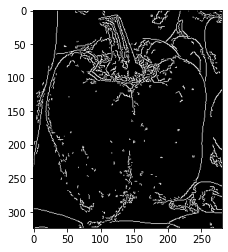

In [48]:
edge_cann = cv2.Canny(img, 80, 120)
plt.imshow(edge_cann, cmap='gray')
if FLAG_fig: plt.savefig('IMG_edge_cann.png')

## 周波数フィルタリング

In [26]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

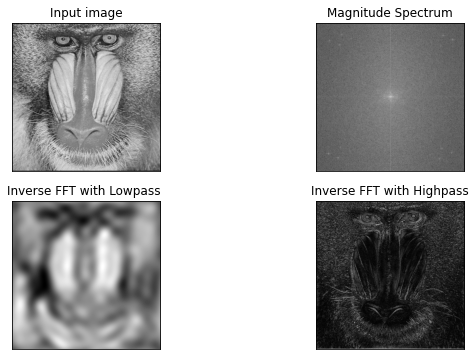

In [53]:
img = cv2.imread('data/baboon.jpg',0)

dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

isize=10 # マスクの半分のサイズ

# ローパスフィルタ用マスクの作成，中心正方領域は1，それ以外は0
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-isize:crow+isize, ccol-isize:ccol+isize] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back1 = cv2.idft(f_ishift)
img_back1 = cv2.magnitude(img_back1[:,:,0],img_back1[:,:,1])

# ハイパスフィルタ用マスクの作成，中心正方領域は0，それ以外は1
mask = np.ones((rows,cols,2),np.uint8)
mask[crow-isize:crow+isize, ccol-isize:ccol+isize] = 0
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back2 = cv2.idft(f_ishift)
img_back2 = cv2.magnitude(img_back2[:,:,0],img_back2[:,:,1])


fig, ((axLU, axRU), (axLL, axRL)) = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

axLU.imshow(img, cmap = 'gray')
axLU.set_title('Input image'),
axLU.set_xticks([]), axLU.set_yticks([]) # Remove ticks

axRU.imshow(magnitude_spectrum, cmap = 'gray')
axRU.set_title('Magnitude Spectrum')
axRU.set_xticks([])
axRU.set_yticks([])

axLL.imshow(img_back1, cmap = 'gray')
axLL.set_title('Inverse FFT with Lowpass '),
axLL.set_xticks([])
axLL.set_yticks([]) # Remove ticks

axRL.imshow(img_back2, cmap = 'gray')
axRL.set_title('Inverse FFT with Highpass')
axRL.set_xticks([])
axRL.set_yticks([])
if FLAG_fig: plt.savefig('IMG_DFT.png')
plt.show()


## 特徴点抽出

In [49]:
import cv2
import sys

# Haar-like特徴分類器の読み込み
face_cascade = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('data/haarcascades/haarcascade_eye.xml')

# 顔データの読込み
img = cv2.imread('data/face.png')

# グレースケール変換
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 顔を検知
faces = face_cascade.detectMultiScale(gray)

In [50]:
for (x,y,w,h) in faces:
    # 検知した顔を矩形で囲む
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # 顔画像（グレースケール）
    roi_gray = gray[y:y+h, x:x+w]
    # 顔画像（カラースケール）
    roi_color = img[y:y+h, x:x+w]
    # 顔の中から目を検知
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        # 検知した目を矩形で囲む
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

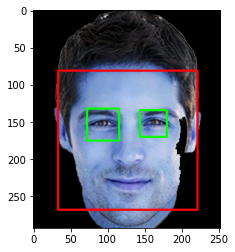

In [51]:
# 画像表示
plt.imshow(img, cmap='gray')